In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style = 'whitegrid',palette = 'tab10')

train = pd.read_csv('train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [2]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB


In [3]:
train.describe()#观察训练集数据描述统计

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


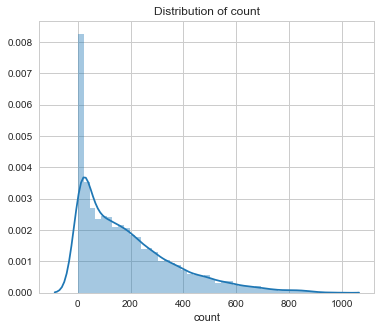

In [4]:
#观察租赁额密度分布
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
fig.set_size_inches(6,5)
sns.distplot(train['count'])
ax.set(xlabel = 'count',title = 'Distribution of count',)

In [5]:
train_WithoutOutliers = train[np.abs(train['count']-train['count'].mean())<=(3*train['count'].std())]
train_WithoutOutliers.shape

(10739, 12)

In [6]:
train_WithoutOutliers['count'].describe()

count    10739.000000
mean       183.003818
std        166.681429
min          1.000000
25%         41.000000
50%        141.000000
75%        276.000000
max        734.000000
Name: count, dtype: float64

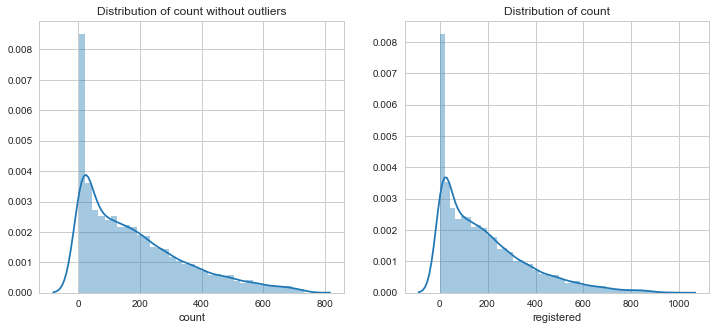

In [7]:
#看下去掉3个标准差以外数据后的密度分布
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
fig.set_size_inches(12,5)

sns.distplot(train_WithoutOutliers['count'],ax=ax1)
sns.distplot(train['count'],ax=ax2)

ax1.set(xlabel='count',title='Distribution of count without outliers',)
ax2.set(xlabel='registered',title='Distribution of count')

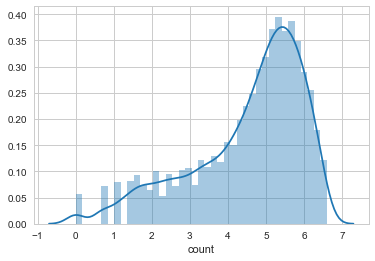

In [8]:
#对数据进行对数变换
yLabels = train_WithoutOutliers['count']
yLabels_log = np.log(yLabels)
sns.distplot(yLabels_log)

In [9]:
Bike_data = pd.concat([train_WithoutOutliers,test],ignore_index = True)#只是将test接到train_WithoutOutliers后面，并没有按照时间排序
Bike_data.shape

(17232, 12)

In [10]:
#将datetime拆分成日期 时段 年份 月份 星期五列
Bike_data['date'] = Bike_data.datetime.apply(lambda c:c.split()[0])
Bike_data['hour']=Bike_data.datetime.apply( lambda c : c.split( )[1].split(':')[0]).astype('int')
Bike_data['year']=Bike_data.datetime.apply( lambda c : c.split( )[0].split('-')[0]).astype('int')
Bike_data['month']=Bike_data.datetime.apply( lambda c : c.split( )[0].split('-')[1]).astype('int')
Bike_data['weekday']=Bike_data.date.apply( lambda c : datetime.strptime(c,'%Y-%m-%d').isoweekday())


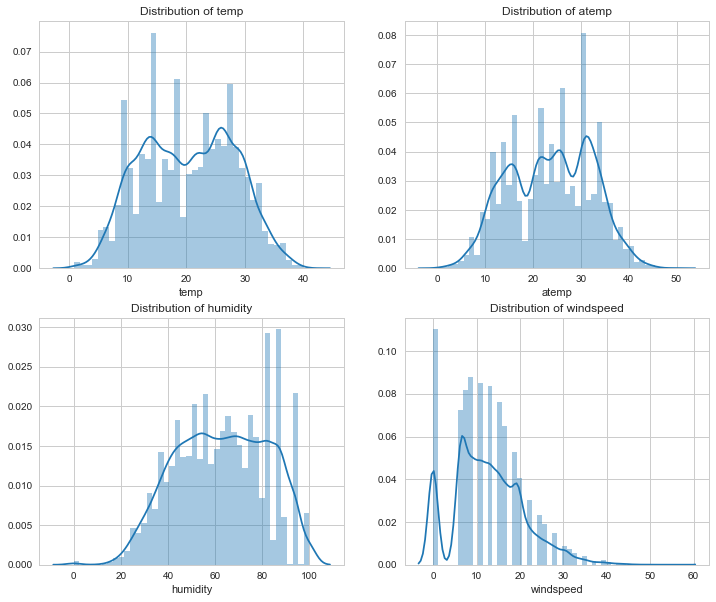

In [11]:
fig,axes = plt.subplots(2,2)
fig.set_size_inches(12,10)
sns.distplot(Bike_data['temp'],ax=axes[0,0])
sns.distplot(Bike_data['atemp'],ax=axes[0,1])
sns.distplot(Bike_data['humidity'],ax=axes[1,0])
sns.distplot(Bike_data['windspeed'],ax=axes[1,1])

axes[0,0].set(xlabel='temp',title='Distribution of temp',)
axes[0,1].set(xlabel='atemp',title='Distribution of atemp')
axes[1,0].set(xlabel='humidity',title='Distribution of humidity')
axes[1,1].set(xlabel='windspeed',title='Distribution of windspeed')

In [12]:
#使用随机森林填充风速
from sklearn.ensemble import RandomForestRegressor
Bike_data['windspeed_rfr'] = Bike_data['windspeed']#相当于又增加了一列
#将数据分为有风和没有风两部分
dataWind0 = Bike_data[Bike_data['windspeed_rfr']==0]
dataWindNot0 = Bike_data[Bike_data['windspeed_rfr']!=0]
#选定模型
# rfModel_wind = RandomForestRegressor(n_estimators = 1000,random_state = 42)
# #选定特征
windColumns = ['year','month','hour','weekday','season','weather','humidity','temp','atemp','holiday','workingday']
# #将风速不等于0的数据作为训练集，fit到模型中
# rfModel_wind.fit(dataWindNot0[windColumns],dataWindNot0['windspeed_rfr'])
# #通过训练好的模型 预测风速
# wind0Values = rfModel_wind.predict(X = dataWind0[windColumns])
# #将预测的风俗填充到风速为0的数据中
# dataWind0.loc[:,'windspeed_rfr'] = wind0Values
# #连接两部分数据
# Bike_data = dataWindNot0.append(dataWind0)

#使用xgboost填充风速
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
rfModel_wind = XGBClassifier(
 learning_rate =0.2,
 n_estimators=40,
 max_depth=9,
 min_child_weight=1,
 gamma=0,
 subsample=0.7,
 colsample_bytree=0.7,
 objective= 'reg:linear',
 nthread=4,
 scale_pos_weight=1,
 reg_alpha = 1e-5,
 reg_lambda=1,
 n_jobs=4
)
rfModel_wind.fit(dataWindNot0[windColumns],dataWindNot0['windspeed_rfr'])
wind0Values = rfModel_wind.predict(dataWind0[windColumns])
#将预测的风俗填充到风速为0的数据中
dataWind0.loc[:,'windspeed_rfr'] = wind0Values
#连接两部分数据
Bike_data = dataWindNot0.append(dataWind0)


In [13]:
#选择特征值
#根据前面的观察，决定将时段（hour）、温度（temp）、湿度（humidity）、年份（year）、月份（month）、季节（season）、
#天气等级（weather）、风速（windspeed_rfr）、星期几（weekday）、是否工作日（workingday）、是否假日（holiday），
#11项作为特征值
#pandas使用get_dummies进行one-hot 编码
dummies_month = pd.get_dummies(Bike_data['month'], prefix= 'month')
dummies_season=pd.get_dummies(Bike_data['season'],prefix='season')
dummies_weather=pd.get_dummies(Bike_data['weather'],prefix='weather')
dummies_year=pd.get_dummies(Bike_data['year'],prefix='year')
#把5个新的DF和原来的表连接起来
Bike_data=pd.concat([Bike_data,dummies_month,dummies_season,dummies_weather,dummies_year],axis=1)


In [14]:
#分离训练集和测试集
dataTrain = Bike_data[pd.notnull(Bike_data['count'])]
dataTest= Bike_data[~pd.notnull(Bike_data['count'])].sort_values(by=['datetime'])
datetimecol = dataTest['datetime']
yLabels=dataTrain['count']
yLabels_log=np.log(yLabels)

#把不要的列丢弃，注意风速已经用windspeed_rfr代替了,month season weather year已经使用one-hot编码的变量代替了
#atemp为什么删掉？ 经过测试 删掉得分0.40238 不删掉0.40076，所以不删掉更好
dropFeatures = ['casual' , 'count' , 'datetime' , 'date' , 'registered' ,
                'windspeed' , 'month','season','weather', 'year' ]

dataTrain = dataTrain.drop(dropFeatures , axis=1)
dataTest = dataTest.drop(dropFeatures , axis=1)

In [15]:
#试着将数据归一化试一下
#将数据归一化之后 分数变成0.39948 又好了一点
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler(feature_range=(0, 1))
dataTrain = scaler1.fit_transform(dataTrain)

scaler2 = MinMaxScaler(feature_range=(0, 1))
dataTest = scaler2.fit_transform(dataTest)

In [ ]:
#如果用xgboost会不会更好一点
#0.38904
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
x = dataTrain
y = yLabels_log
#X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=8,test_size=test_size)  
xgb_params = { 

'eta': 0.01, 
'max_depth': 5, 
'subsample': 0.7, #对于每棵树 随机采样的比例大小 值设的偏小会导致欠拟合 
'colsample_bytree': 0.7, #每棵随机采样的列数的占比 
'objective': 'reg:linear', 
'eval_metric': 'rmse', 
'silent': 1 
}

#xgboost加载数据为DMatrix对象 
dtrain = xgb.DMatrix(x, y) 

#xgboost交叉验证并输出rmse 
cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=2000, early_stopping_rounds=50, 
verbose_eval=100, show_stdv=False) 
#num_boost_round（迭代次数）应该就是估计器的个数
cv_output[['train-rmse-mean', 'test-rmse-mean']].plot() 
#训练模型
model = xgb.train(dict(xgb_params, silent=1), dtrain, num_boost_round=2000)
dtest = xgb.DMatrix(dataTest)
#预测模型
preds1 = model.predict(dtest,ntree_limit=model.best_iteration)
submission=pd.DataFrame({'datetime':datetimecol , 'count':[max(0,x) for x in np.exp(preds1)]})
submission.to_csv('bike_predictionsxgboost.csv',index=False)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import grid_search
import xgboost as xgb
#下面是sklearn中的包 用这个太费时间了
param_test1 = {
  'subsample':[i for i in np.arange(0.5,0.7,0.1)]
  
}
gsearch1 = grid_search.GridSearchCV(
estimator = XGBClassifier(
learning_rate =0.2,
n_estimators=40,
max_depth=9,
min_child_weight=1,
gamma=0,
subsample=0.7,
colsample_bytree=0.7,
objective= 'reg:linear',#代表回归
nthread=4,
scale_pos_weight=1,
seed=0),
param_grid = param_test1,
scoring='neg_mean_squared_error',#一个回归用的表示误差之类的东西
n_jobs=4,
cv= 5)
gsearch1.fit(x,y)
gsearch1.best_params_#输出最好的对应的参数